In [133]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,normalize

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [118]:
data = pd.read_csv("sign_mnist_train.csv")

In [119]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [120]:
labels = (train.label).values

In [121]:
column = ["label"]
features = (train.drop(column,axis=1)).values

In [122]:
features.shape

(27455, 784)

In [123]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

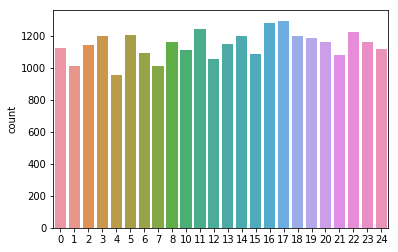

In [124]:
sns.countplot(x=labels)

In [125]:
features = features.reshape(features.shape[0], 28, 28, 1)
features.shape

(27455, 28, 28, 1)

3


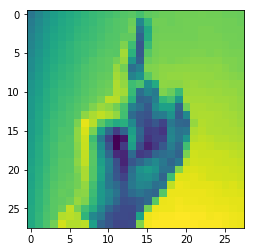

In [126]:
plt.imshow(features[0].reshape(28,28))
print(labels[0])

In [127]:
(x_train,x_test,y_train,y_test) = train_test_split(features,labels,test_size=0.2) 

x_train = x_train/255
x_test = x_test/255

In [128]:
x_train_flat = x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_test_flat = x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

In [129]:
accuracy_results.mean()

0.9664901473753933

In [130]:
model = LogisticRegression()
model.fit(x_train_flat,y_train)
predictions = model.predict(x_test_flat)
accuracy_score(y_test,predictions)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9987251866690949

In [131]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [139]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape= x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

#model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 120, epochs=5,validation_data = (x_test,y_test))

Train on 21964 samples, validate on 5491 samples
Epoch 1/10
21964/21964 [==============================] - 38s 2ms/step - loss: 1.2981 - acc: 0.6343 - val_loss: 0.3086 - val_acc: 0.9080
Epoch 2/10
21964/21964 [==============================] - 40s 2ms/step - loss: 0.1241 - acc: 0.9730 - val_loss: 0.0261 - val_acc: 0.9996
Epoch 3/10
21964/21964 [==============================] - 39s 2ms/step - loss: 0.0163 - acc: 0.9994 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 4/10
21964/21964 [==============================] - 40s 2ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 5/10
21964/21964 [==============================] - 40s 2ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/10
21964/21964 [==============================] - 39s 2ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 7.5929e-04 - val_acc: 1.0000
Epoch 7/10
21964/21964 [==============================] - 41s 2ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 9.7374e-04 - 

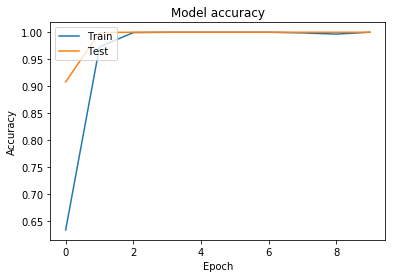

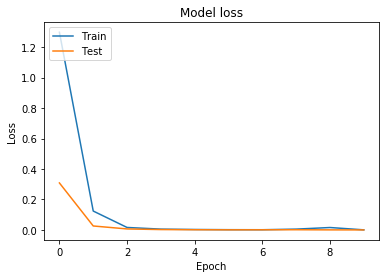

In [140]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()